<a href="https://colab.research.google.com/github/ffathy-tdx/waiter-s-tips-prediction/blob/main/Copy_of_tipsMLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project explores a tipping dataset and builds a predictive model for tip amount prediction.


### Importing libraries and loading the dataset


In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.metrics import r2_score

df = pd.read_csv('/content/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#Checking for missing values

In [105]:
print(df.isna().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


# Insert imputer (filling missing values)
Here, we don't have any values. However, if there were any missing values, we would either drop or replace them., we can use many imputation techniques. Here, we'll fill any missing values with the mean value of the column.

---


# Dropping unnecessary columns
If there are any unnecessary columns that we don't need for our analysis or modeling, we can drop them using the drop() function.


In [106]:
df.fillna(df.mean(), inplace=True)

<ipython-input-106-bf934754a5b1>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [107]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#Exploratory Data Analysis (EDA)
Performing exploratory data analysis to understand the distribution and relationships in the dataset.

#Univariate Exploration
histogram plots for the tip amount and bill amount, which show the distribution of these variables individually. This satisfies the requirement of univariate exploration.

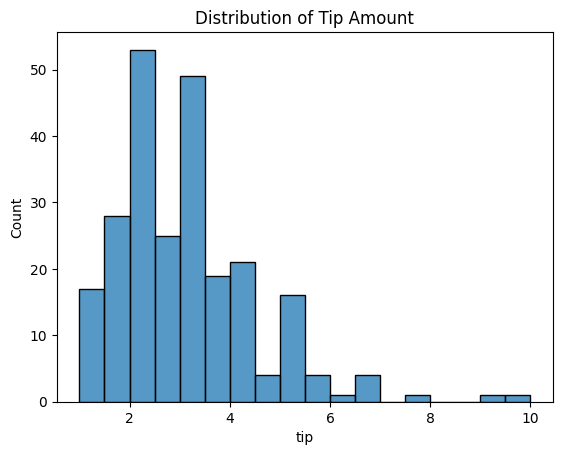

In [108]:
sns.histplot(data=df, x='tip')
plt.title('Distribution of Tip Amount')
plt.show()

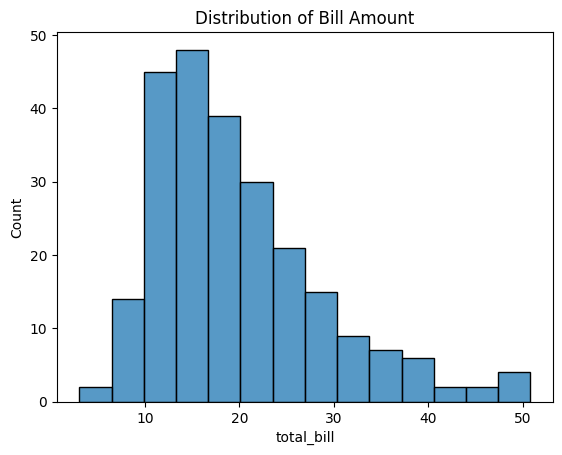

In [109]:
sns.histplot(data=df, x='total_bill')
plt.title('Distribution of Bill Amount')
plt.show()

#Bivariate exploration
 box plots to analyze the relationship between the tip amount and the day of the week, as well as the time of day. This fulfills the requirement of bivariate exploration.

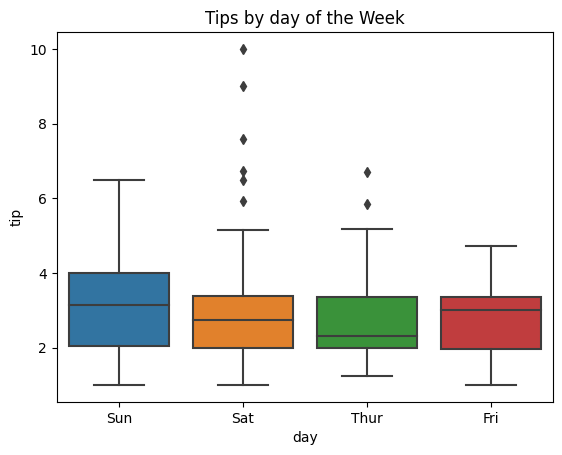

In [110]:
sns.boxplot(data=df, x='day', y='tip')
plt.title('Tips by day of the Week')
plt.show()

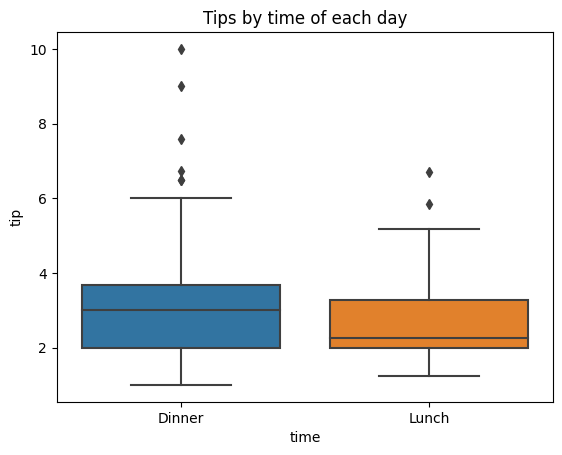

In [111]:
sns.boxplot(data=df, x='time', y='tip')
plt.title('Tips by time of each day')
plt.show()

#Multivariate Exploration:

a bar plot that shows the relationship between the tip amount, customer gender, and smoker status. This covers a multivariate relationship.

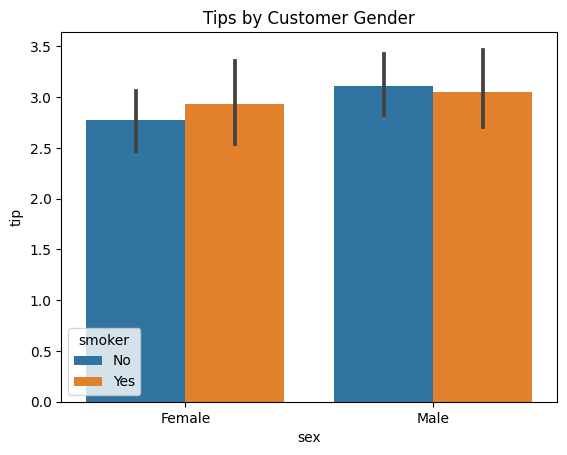

In [88]:
sns.barplot(data=df, x='sex', y='tip', hue="smoker")

plt.title('Tips by Customer Gender')
plt.show()

a scatter plot that includes three variables: 'total_bill' on the x-axis, 'tip' on the y-axis, and the 'day' variable represented by color. Additionally, we are incorporating the 'size' variable by adjusting the size of the markers.

By visualizing the relationships between these four variables simultaneously, we are conducting multivariate exploration. 


In [89]:
figure = px.scatter(data_frame = df, x="total_bill",y="tip", size="size", color= "day", trendline="ols")
figure.show()

Same as previous plot. But, instead of color coding the markers based on the 'day' variable, we color-code them based on the 'time' variable, representing different meal times (e.g., lunch or dinner).

In [90]:
figure = px.scatter(data_frame = df, x="total_bill",y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [91]:
figure = px.pie(df, values='tip', names='day')
figure.show()

In [92]:
figure = px.pie(df, values='tip', names='sex')
figure.show()

In [93]:
figure = px.pie(df, values='tip', names='smoker')
figure.show()

In [94]:
figure = px.pie(df, values='tip', names='time')
figure.show()

<ipython-input-95-cd29b4831cf0>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

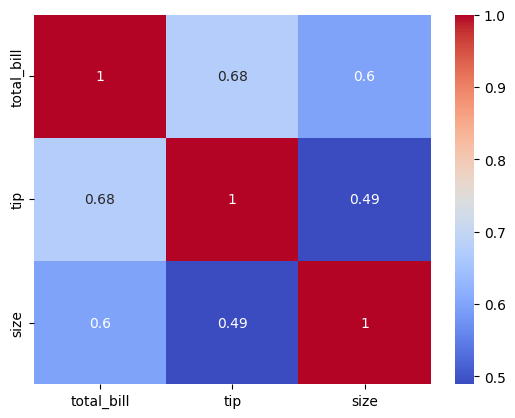

In [95]:
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)


Now we are done loading the tipping dataset, checking for missing values, and performing several EDA tasks. The box plots and bar plot reveal some potential relationships between tips and other variables such as day of the week, time of day, and customer gender.

Next, we can split the dataset into a training set and testing set and build our predictive model. But before that, we will map categorical variables to numerical values so they are easier to work with.





In [96]:
df["sex"] = df["sex"].map({ "Male": 1, "Female": 0})
df["smoker"] = df["smoker"].map({"Yes": 1,"No": 0})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
88,24.71,5.85,1,0,0,0,2
117,10.65,1.50,0,0,0,0,2
54,25.56,4.34,1,0,3,1,4
93,16.32,4.30,0,1,1,1,2
196,10.34,2.00,1,1,0,0,2


# Split the data into training and test sets


In [97]:
X = df[["total_bill", "sex", "smoker", "day", "time", "size"]]
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
print(len(X_test))
print(len(y_test))

49
49


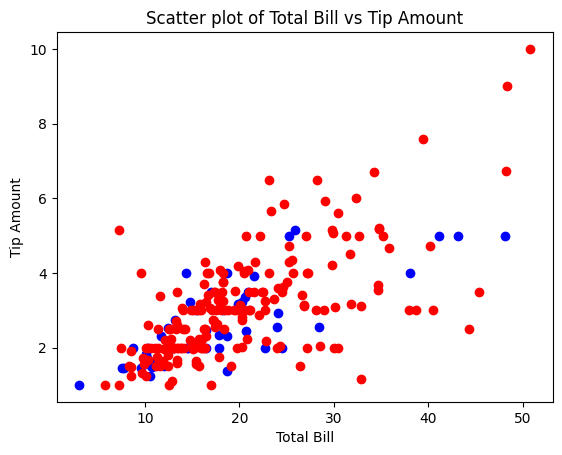

In [99]:
plt.scatter(X_test["total_bill"], y_test, color='b')
plt.scatter(X_train["total_bill"], y_train, color='r')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.title('Scatter plot of Total Bill vs Tip Amount')
plt.show()

# OLS model


In [100]:
X_ols = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_ols).fit()
y_ols_pred = model_ols.predict(sm.add_constant(X_test))
r2_ols = r2_score(y_test, y_ols_pred)


#Polynomial Regression model

In [101]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model_poly = LinearRegression().fit(X_poly, y_train)
X_test_poly = poly.transform(X_test)
y_poly_pred = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_poly_pred)

#Random Forest model

In [116]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = mean_squared_error(y_test, y_pred_rf)

RMSE (Random Forest Regression): 0.9694429672418564


#SVR model

In [121]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

r2_svr = mean_squared_error(y_test, y_pred_svr)

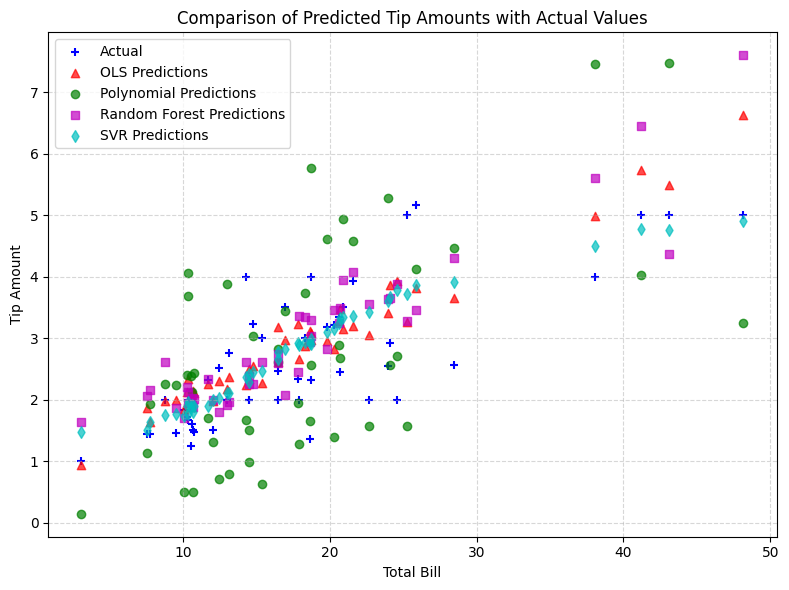

In [133]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test["total_bill"], y_test, color='b', label='Actual', marker='+', alpha=1)
plt.scatter(X_test["total_bill"], y_ols_pred, color='r', label='OLS Predictions', marker='^', alpha=0.7)
plt.scatter(X_test["total_bill"], y_poly_pred, color='g', label='Polynomial Predictions', marker='o', alpha=0.7)
plt.scatter(X_test["total_bill"], y_pred_rf, color='m', label='Random Forest Predictions', marker='s', alpha=0.7)
plt.scatter(X_test["total_bill"], y_pred_svr, color='c', label='SVR Predictions', marker='d', alpha=0.7)

plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.title('Comparison of Predicted Tip Amounts with Actual Values')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

In [123]:
print("OLS R-squared:", r2_ols)
print("Polynomial regression R-squared:", r2_poly)
print('Random forest R-squared:',r2_rf)
print('SVR R-squared:',r2_svr)

OLS R-squared: 0.44293996874900254
Polynomial regression R-squared: -0.6228045553400889
Random forest R-squared: 0.9694429672418564
SVR R-squared: 0.5333294841580878
